# <span style="color:blue"><ins> Mobile price classification </ins></span>

Authors: <ins>*Alessio Franchi, Manuel Naviglio*</ins>

The aim of this notebook is to explore and analize the mobile-phones dataset to get new useful insights.
The mobile_price dataset contains **20** features:

0. **battery_power** : Total energy a battery can store in one time measured in mAh
1. **blue** : Has bluetooth or not
2. **clock_speed** : Speed at which microprocessor executes instructions
3. **dual_sim** : Has dual sim support or not
4. **fc** : Front Camera mega pixels
5. **four_g** : Has 4G or not
6. **int_memory** : Internal Memory in Gigabytes
7. **m_dep** : Mobile Depth in cm
<img src="https://cdn.pixabay.com/photo/2016/12/09/11/33/smartphone-1894723_960_720.jpg" align="right" width="420" height="620">
8. **mobile_wt** : Weight of mobile phone
9. **n_cores** : Number of cores of processor
10. **pc** : Primary Camera mega pixels
11. **px_height** : Pixel Resolution Height
12. **px_width** : Pixel Resolution Width
13. **ram** : Random Access Memory in Megabytes
14. **sc_h** : Screen Height of mobile in cm
15. **sc_w** : Screen Width of mobile in cm
16. **talk_time** : Longest time that a single battery charge will last when you are
17. **three_g** : Has 3G or not
18. **touch_screen** : Has touch screen or not
19. **wifi** : Has wifi or not
20. **price_range** : Price range of the mobile



In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    # visualization library
%matplotlib inline

# remove python warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the dataset
data = pd.read_csv('mobile_price_classification.csv')

In [3]:
# main info and describe
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


There are no **missing values**. Moreover, all the data have a numerical type, either **int64** or **float64**.

Before visualizing the data, we **hold-out** a **validation** dataset. This set would be useful to validate our models at the end of the analysis.

In [14]:
# import StratifiedShuffleSplit to divide the dataset indices into two stratified sets
from sklearn.model_selection import StratifiedShuffleSplit

# select the indices to construct the train and validation datasets
train_indices, val_indices = list(StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=101).split(data.drop('price_range', axis=1), data['price_range']))[0]

# construct train and validation sets by passing the indices found
train, val = data.loc[train_indices], data.loc[val_indices]

array([1, 2, 0, 3], dtype=int64)

From this moment on, we focus on the train dataset. We now consider the distributions of all the features. 

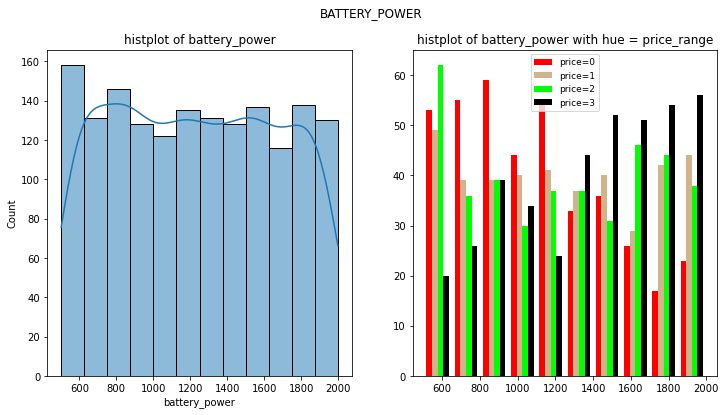

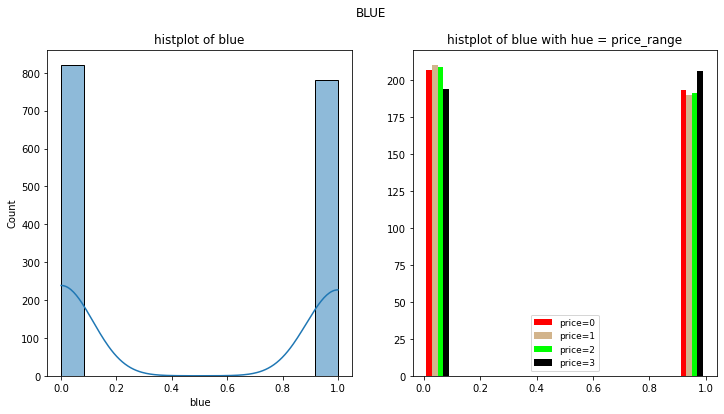

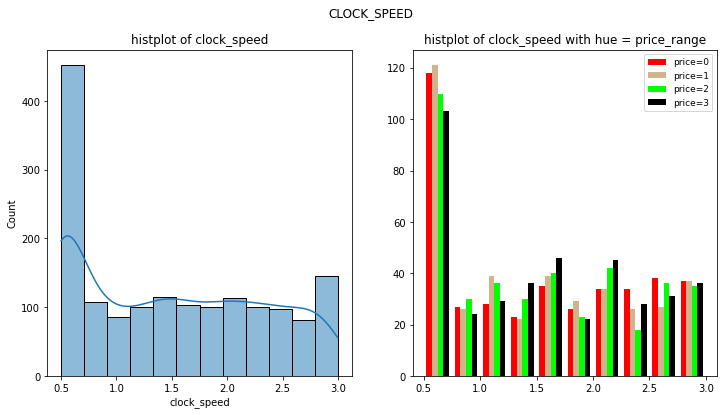

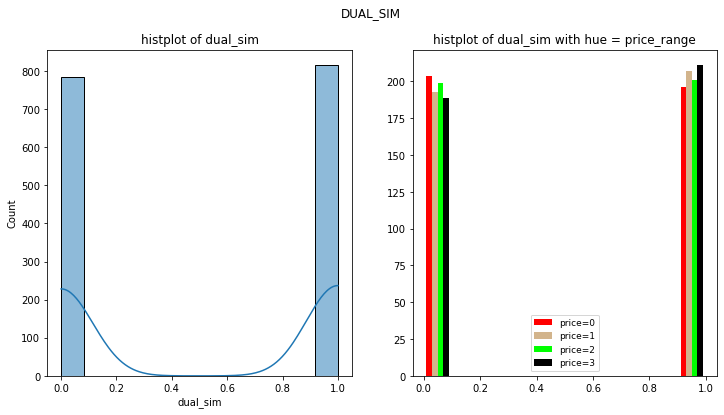

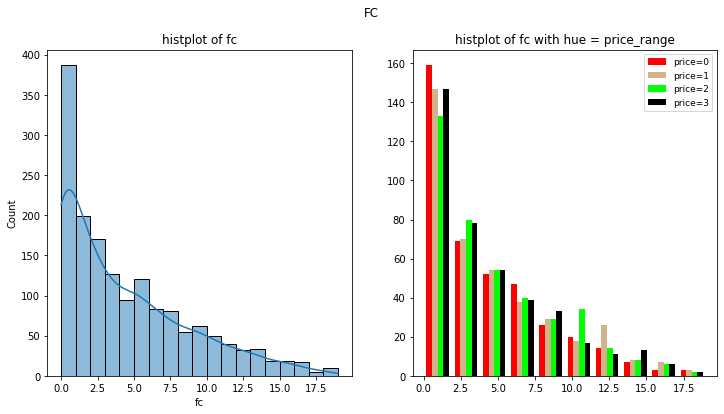

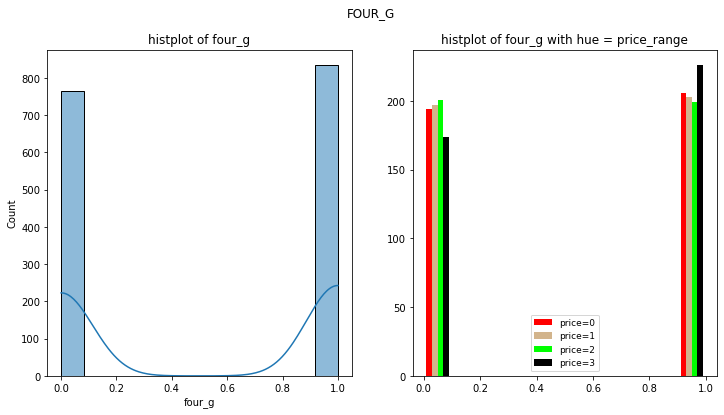

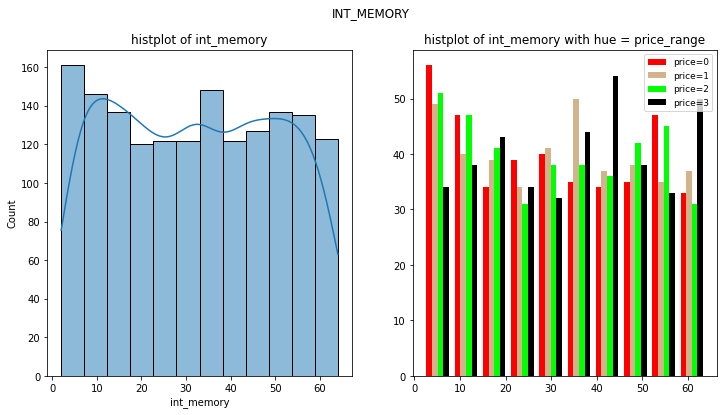

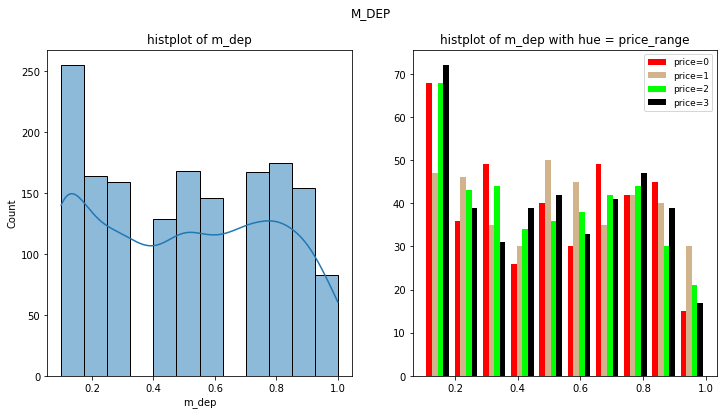

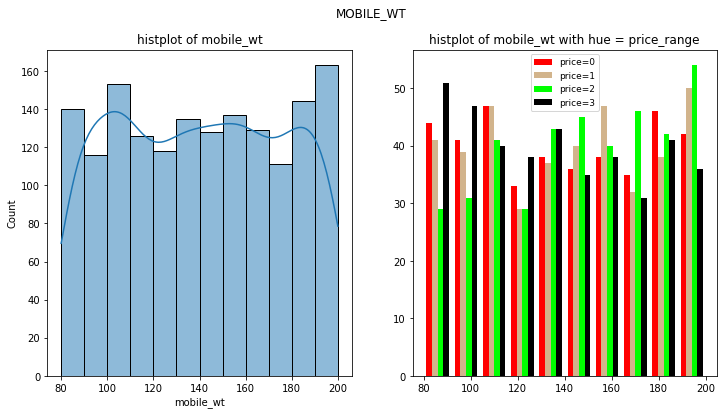

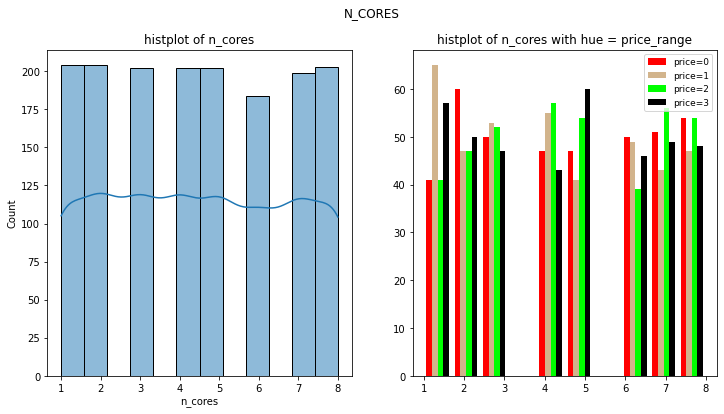

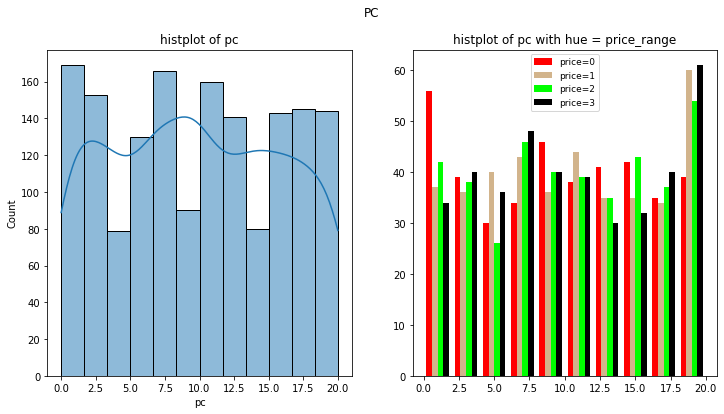

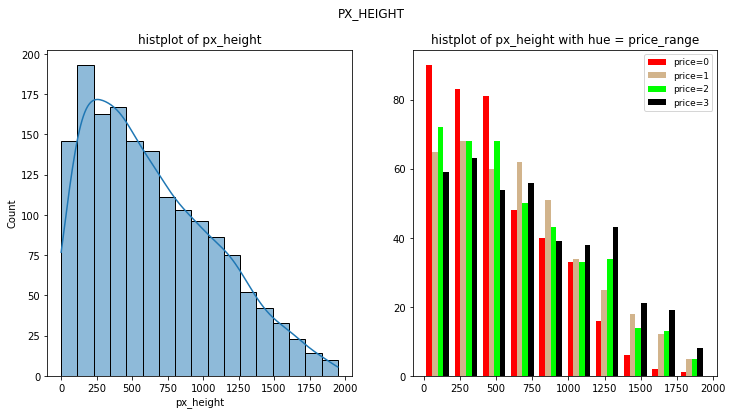

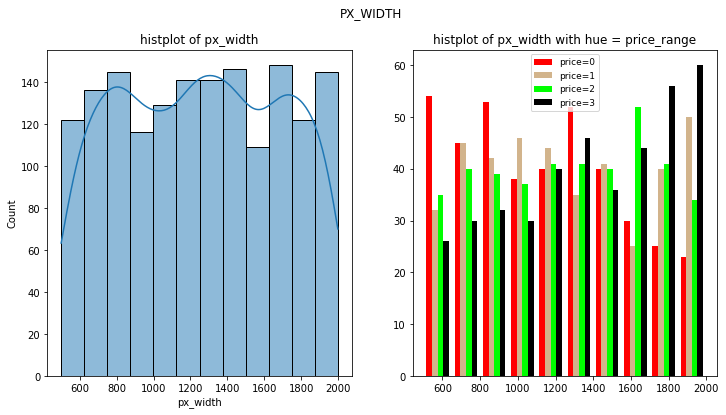

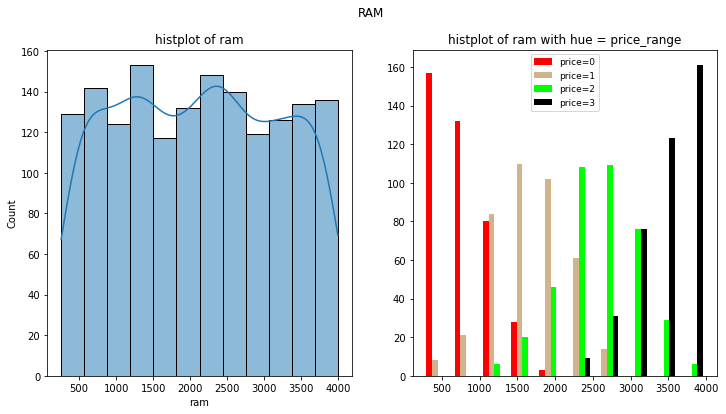

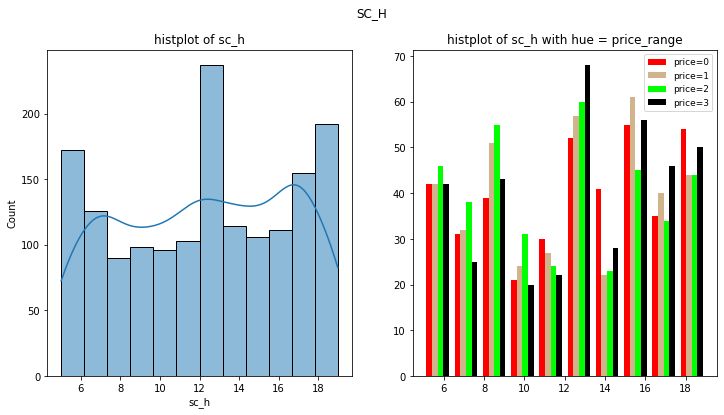

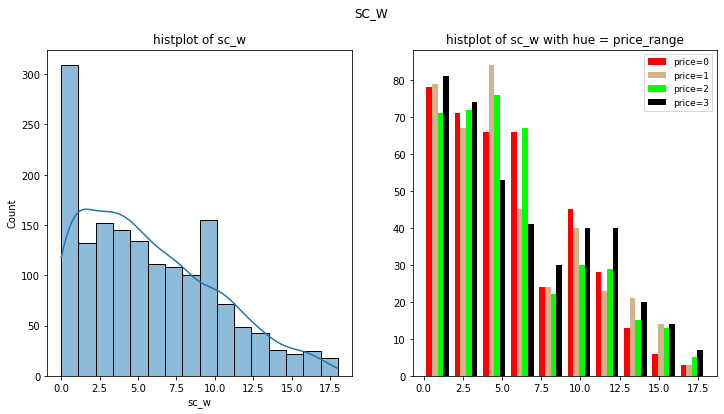

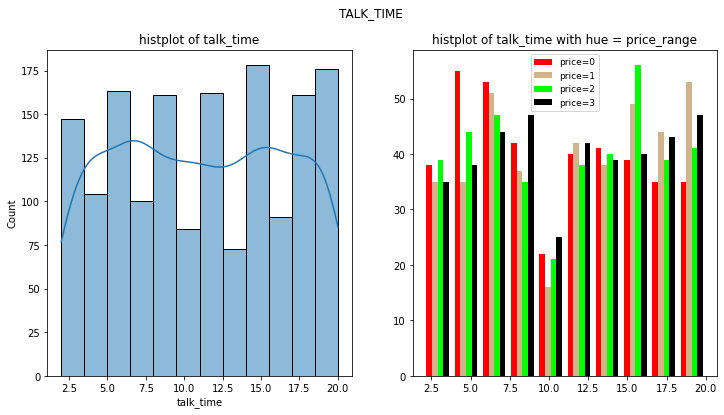

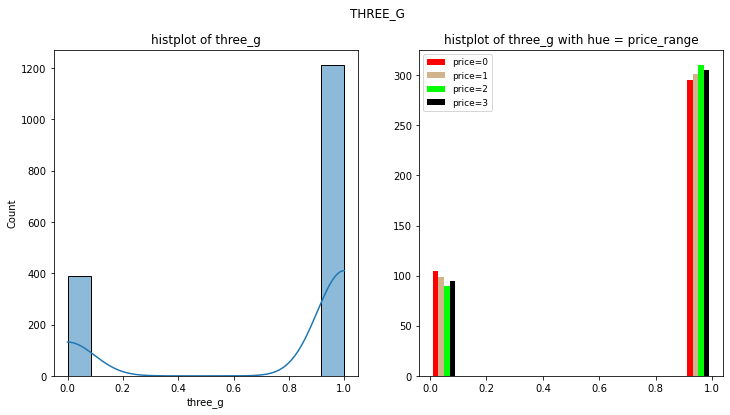

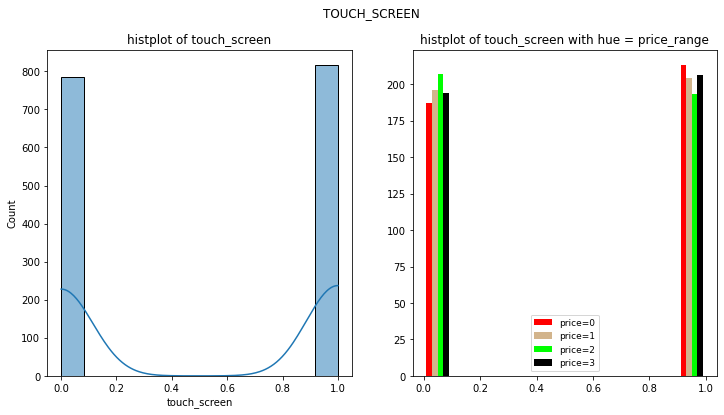

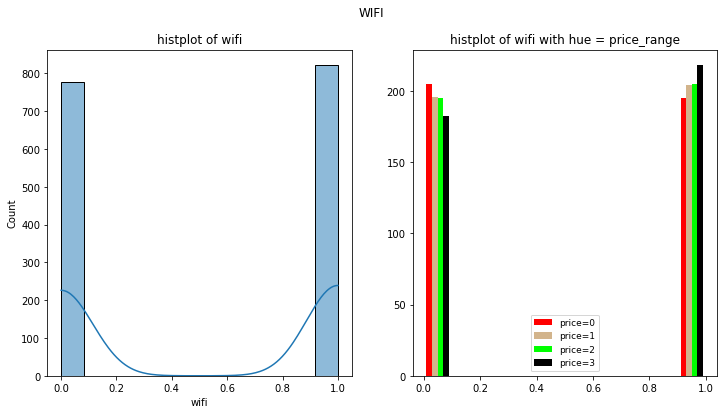

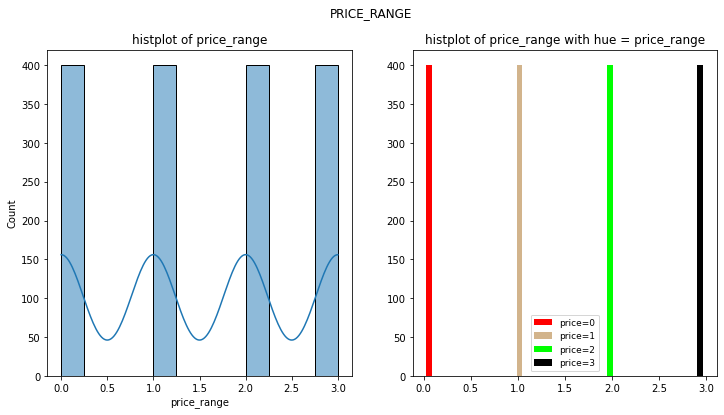

In [26]:
# cycle over all columns apart from the target (price_range)
for col in train.columns:
    # create a 1 X 2 subplot
    fig, ax = plt.subplots(1, 2, figsize = (12, 6))
    
    # overall title
    fig.suptitle(col.upper())
    
    # LEFT plot, histograms of the feature 
    ax.ravel()[0].set_title('histplot of '+ col)
    sns.histplot(data=train, x=col, kde=True, ax=ax.ravel()[0])
    
    # RIGHT plot, histograms of the feature with hue = mobile price
    # create a temporary variable containing the feature under analysis grouped by price_range
    temp = [train[train['price_range'] == 0][col], train[train['price_range'] == 1][col], train[train['price_range'] == 2][col], train[train['price_range'] == 3][col]]
    # choose 4 flashy colors
    colors = ['red', 'tan', 'lime', 'black']
    # plot in the right plot the distributions grouped by 'price_range'
    ax.ravel()[1].set_title('histplot of '+ col +' with hue = price_range')
    ax.ravel()[1].hist(temp, density=False, histtype='bar', color=colors, label=['price='+str(i) for i in range(4)])
    plt.legend(loc='best', fontsize=9)

In [32]:
train['battery_power'].max()

1998